# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

#### Data Description

Dataset from Kaggle: [World Happiness Report](https://www.kaggle.com/mathurinache/world-happiness-report) (This dataset contains Happiness Score for 153 countries)

The happiness score is measured by the following factors:
- `'GDP'`
- `'Life Expectancy'`
- `'Social Support'`
- `'Freedom'`
- `'Generosity'`
- `'Corruption Perception'`
- `'Residual Error'`

**Excerpt from [Wikipedia](https://en.wikipedia.org/wiki/World_Happiness_Report):**
<br>
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.
<br> <br>
Data is collected from people in over 150 countries. Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. These variables currently include: real GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Each country is also compared against a hypothetical nation called Dystopia. Dystopia represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark. <br>
[know more](https://worldhappiness.report/ed/2015/)


#### Data Wrangling

In total we have 6 .csv files broken per year (2015 - 2020). To get started we need to:
- Merge all Datasets into one and make a new column for `'Year'`
- Rename column names since not all datasets have the same name
- Drop columns that are not present on other datasets *(note: `'Residual Error'` is not present in **2018 & 2019 files** but we will retain this)*

In [2]:
# Read in data

# path = 'whryear/'
# files = glob.glob(os.path.join(path,'y.*.csv'))
files = glob.glob('20*.csv')

# renaming columns based on 2015 & 2016 data
columns_2017 = {'Happiness.Rank':'Happiness Rank', 
                'Happiness.Score' : 'Happiness Score', 
                'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 
                'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 
                'Dystopia.Residual' : 'Dystopia Residual'}

# 2018 & 2019 have the same column names
columns_1819 = {'Overall rank':'Happiness Rank', 
                'Country or region' : 'Country', 
                'Score' : 'Happiness Score',
                'GDP per capita' : 'Economy (GDP per Capita)', 
                'Social support' : 'Family',
                'Healthy life expectancy' : 'Health (Life Expectancy)',
                'Freedom to make life choices' : 'Freedom', 
                'Perceptions of corruption' : 'Trust (Government Corruption)'}

columns_2020 = {'Country name' : 'Country', 
                'Ladder score' : 'Happiness Score', 
                'Logged GDP per capita' : 'Economy (GDP per Capita)', 
                'Social support' : 'Family', 
                'Healthy life expectancy' : 'Health (Life Expectancy)',
                'Freedom to make life choices' : 'Freedom', 
                'Perceptions of corruption' : 'Trust (Government Corruption)',
                'Dystopia + residual' : 'Dystopia Residual'}


column_names_for_year = {
"2015" : {},
"2016" : {},
"2017" : columns_2017,
"2018" : columns_1819,
"2019" : columns_1819,
"2020" : columns_2020
}


# Storing into a list(for concat)
df_all = []
for f in files:
    df = pd.read_csv(f) # Read data
    year = f.split('.')[0] # get year
    df = df.rename(columns=column_names_for_year[year]) # Renaming
    df['Year'] = year # make 'Year' column
    df_all.append(df)

# Concatenate
merged_df = pd.concat(df_all, ignore_index=True, sort=True)

# column list(to retain) - drop other columns
col_list=['Country',
          'Happiness Rank',
          'Happiness Score',
          'Economy (GDP per Capita)',
          'Family',
          'Health (Life Expectancy)',
          'Freedom',
          'Trust (Government Corruption)',
          'Dystopia Residual',
          'Year']

merged_df = merged_df[col_list]
merged_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Year
0,Finland,NaN,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,2.762835,2020
1,Denmark,NaN,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,2.432741,2020
2,Switzerland,NaN,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,2.350267,2020
3,Iceland,NaN,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,2.460688,2020
4,Norway,NaN,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,2.168266,2020


In [3]:
# Perform your data wrangling and descriptive stats to help

#### Descriptive Stats

- How many rows and columns do we have? ```(935, 10)```
- What is the data type of each column? <font color='blue'>*Will convert 'Year' to int*</font>
- What is the most common value? Mean? Standard deviation?
- Are there any missing values?
- How do you want to handle the missing values? Remove them? Replace with an arbitrary value? <font color='blue'>*Missing values for Rank will be calculated based on Score*</font>

In [4]:
# How many rows and columns do we have?
merged_df.shape

(935, 10)

In [5]:
# What is the data type of each column?
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        935 non-null    object 
 1   Happiness Rank                 782 non-null    float64
 2   Happiness Score                935 non-null    float64
 3   Economy (GDP per Capita)       935 non-null    float64
 4   Family                         935 non-null    float64
 5   Health (Life Expectancy)       935 non-null    float64
 6   Freedom                        935 non-null    float64
 7   Trust (Government Corruption)  934 non-null    float64
 8   Dystopia Residual              623 non-null    float64
 9   Year                           935 non-null    object 
dtypes: float64(8), object(2)
memory usage: 73.2+ KB


In [6]:
# What is the most common value? Mean? Standard deviation?
merged_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
count,782.000000,935.000000,935.000000,935.000000,935.000000,935.000000,934.000000,623.000000
mean,78.698210,5.394436,2.287264,1.034264,11.057834,0.472008,0.224981,2.063148
std,45.182384,1.124935,3.161344,0.321210,23.799414,0.201962,0.254946,0.567172
min,1.000000,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,40.000000,4.540000,0.695145,0.819085,0.508000,0.337772,0.061039,1.703152
50%,79.000000,5.353500,1.070000,1.035160,0.708060,0.465820,0.110800,2.081786
75%,118.000000,6.198500,1.395705,1.281237,0.892350,0.585785,0.285300,2.431136
max,158.000000,7.808700,11.450681,1.644000,76.804581,0.974998,0.935585,3.837720


In [7]:
merged_df.isna().sum()

Country                            0
Happiness Rank                   153
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Dystopia Residual                312
Year                               0
dtype: int64

#### **2020** data is missing rank column
- Set Happiness Rank based on Happiness Score

encountered problem: [SettingWithCopyWarning](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas) - fixed

In [8]:
# Set Happiness Rank for Year 2020 based on Happiness Score
merged_df.loc[(merged_df.Year == "2020"), 'Happiness Rank'] = merged_df.groupby('Happiness Rank')['Happiness Score'].rank(ascending=False)

In [9]:
# Convert Year to int
merged_df["Year"] = merged_df.Year.astype(int)

In [10]:
# Checking null
merged_df.isna().sum()

Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Dystopia Residual                312
Year                               0
dtype: int64

<font color='blue'>We are also seeing null value for Trust (Government Corruption). Upon checking...</font>

In [11]:
null_col = merged_df[merged_df['Trust (Government Corruption)'].isnull()].index.tolist()
merged_df.loc[null_col]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Year
328,United Arab Emirates,20.0,6.774,2.096,0.776,0.67,0.284,NaN,NaN,2018


***Questions:***

- Leading countries that have a high happiness rank for the past 5 years - **bump chart**
    - What are their scores per year? avg scores for the last 5 years?
- What are the stongest indicator of Happiness Score?
    - Plot Happiness Score against factors
- What are the factors that caused low Happiness Score?

#### Data Visualization

In [12]:
# Happiness Rank
# Making a new df
top_10 = merged_df.pivot(index='Country', columns='Year', values=['Happiness Rank'])
# droping countries that are not not present in all of 2015-2020
top_10 = top_10.dropna(axis = 0)
# Adding a calculated avg column
top_10['Average'] = top_10.mean(axis = 1) #change to Happiness Score
# Adding a calculated avg column
top_10['Rank'] = top_10['Average'].rank()
# Getting the top 10 entries
top_10 = top_10.sort_values(by = ['Average']).head(10)


# Happiness Score
# Making a new df
score_10 = merged_df.pivot(index='Country', columns='Year', values=['Happiness Score'])
# droping countries that are not not present in all of 2015-2020
score_10 = score_10.dropna(axis = 0)
# Adding a calculated avg column
score_10['Average'] = score_10.mean(axis = 1)
# Adding a calculated avg column
score_10['Rank'] = score_10['Average'].rank(ascending=False)
# Getting the top 10 entries
score_10 = score_10.sort_values(by = ['Average'], ascending=False).head(10)


[Markers](https://matplotlib.org/3.2.1/api/markers_api.html) </br>
[Legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

In [13]:
#Flatenning pivot for plotting
top_5 = top_10.head()
flattened = pd.DataFrame(top_5.to_records())
plot_5 = pd.melt(flattened, id_vars=["Country","('Average', '')","('Rank', '')"])
plot_5 = plot_5.rename(columns={"('Average', '')":"Average", "('Rank', '')":"Rank", "variable":"Year","value":"Happiness Rank"})

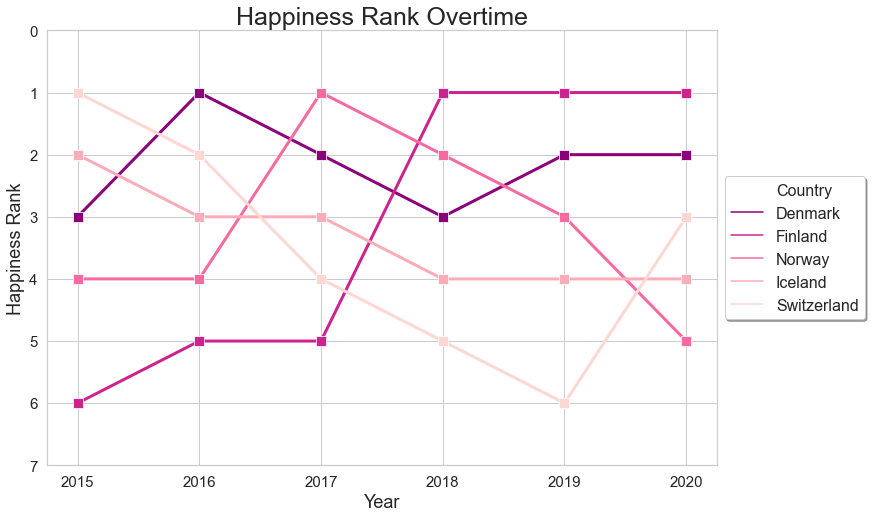

In [14]:
# Bump Chart for top 5 countries
sns.set(style="whitegrid")

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# plt.figure(figsize=(12,8))
plt.title("Happiness Rank Overtime", fontsize=25)
ax = sns.lineplot(x="Year", y="Happiness Rank", hue="Country", marker="s", markersize=10, data=plot_5, palette="RdPu_r", linewidth=3) #style="Country", markers=True, #missing sweden. australia
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(np.arange(8), fontsize=15)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Happiness Rank', fontsize=18)
ax.invert_yaxis()
ax.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16, shadow=True); # loc: center left (6)


fig.savefig('fig1_BumpChart_Happiness_Rank_Overtime_Celon_Patricia.png')

#### **Figure 1.** Happines Rank of the Top 5 countries based of the average Score from 2015 to 2020
We are seeing close competition for the top spot for the leading countries. Finland jumped from top 5 to top 1 on 2018. On the other hand, Switzerland has dropped to 6th place from 2015 to 2019.

In [15]:
score_10.head()

Happiness Score                                       Average Rank
Year                   2015   2016   2017   2018   2019    2020               
Country                                                                       
Finland               7.406  7.413  7.469  7.632  7.769  7.8087  7.582950  1.0
Denmark               7.527  7.526  7.522  7.555  7.600  7.6456  7.562600  2.0
Norway                7.522  7.498  7.537  7.594  7.554  7.4880  7.532167  3.0
Switzerland           7.587  7.509  7.494  7.487  7.480  7.5599  7.519483  4.0
Iceland               7.561  7.501  7.504  7.495  7.494  7.5045  7.509917  5.0

Looking at the scores for these countries, we can see that the differences between their average scores for 2015-2020 are minimal.

**What is the stongest indicator of happiness score**

In [16]:
merged_df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Year
Happiness Rank,1.000000,-0.990846,-0.146958,-0.596231,-0.056935,-0.405746,-0.099219,-0.475711,-0.014503
Happiness Score,-0.990846,1.000000,0.163069,0.594759,0.074028,0.426291,0.120140,0.481476,0.025108
Economy (GDP per Capita),-0.146958,0.163069,1.000000,-0.221830,0.990480,0.712284,0.865444,-0.092164,0.640893
Family,-0.596231,0.594759,-0.221830,1.000000,-0.289828,0.078152,-0.238660,-0.042457,0.059109
Health (Life Expectancy),-0.056935,0.074028,0.990480,-0.289828,1.000000,0.692226,0.865433,-0.092810,0.647656
Freedom,-0.405746,0.426291,0.712284,0.078152,0.692226,1.000000,0.695468,-0.040714,0.449885
Trust (Government Corruption),-0.099219,0.120140,0.865444,-0.238660,0.865433,0.695468,1.000000,-0.079046,0.539995
Dystopia Residual,-0.475711,0.481476,-0.092164,-0.042457,-0.092810,-0.040714,-0.079046,1.000000,-0.143178
Year,-0.014503,0.025108,0.640893,0.059109,0.647656,0.449885,0.539995,-0.143178,1.000000


[Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html) - [Carto Colors](https://carto.com/carto-colors/)

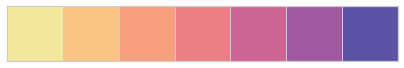

In [17]:
sunset = ["#f3e79b","#fac484","#f8a07e","#eb7f86","#ce6693","#a059a0","#5c53a5"]
sns.palplot(sns.color_palette(sunset))
sns.set_palette(sunset)

# sns.palplot(sns.cubehelix_palette(10))

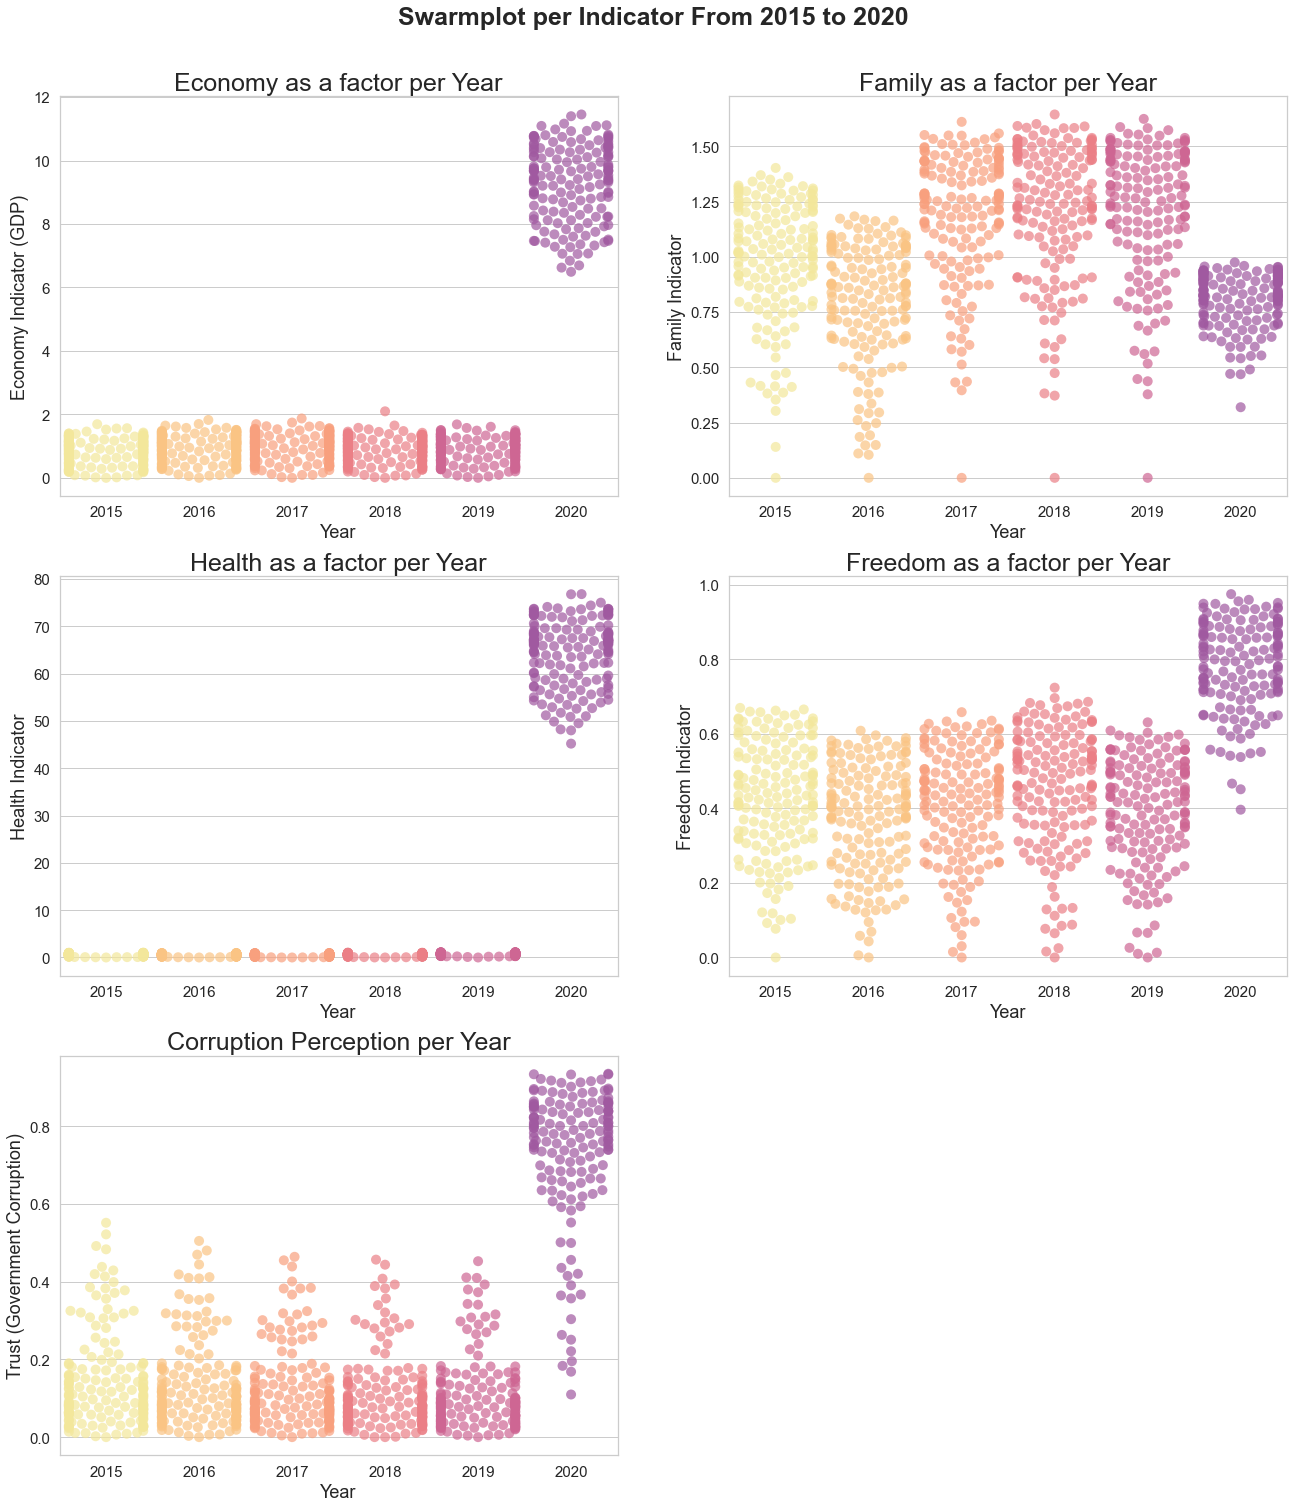

In [18]:
fig = plt.figure(figsize=(22,25))
plt.suptitle('Swarmplot per Indicator From 2015 to 2020', y=0.93, fontsize=25, weight='bold');
sns.set_palette(sunset)

ax = fig.add_subplot(3,2,1)
ax.set_title("Economy as a factor per Year", fontsize=25)
sns.swarmplot(x=merged_df['Year'], y=merged_df['Economy (GDP per Capita)'], s=10, alpha=0.7) #, palette='viridis_r'
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Economy Indicator (GDP)', fontsize=18)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title("Family as a factor per Year", fontsize=25)
sns.swarmplot(x=merged_df['Year'], y=merged_df['Family'], s=10, alpha=0.7)
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(fontsize=15)
ax2.set_xlabel('Year', fontsize=18)
ax2.set_ylabel('Family Indicator', fontsize=18)

ax3 = fig.add_subplot(3,2,3)
ax3.set_title("Health as a factor per Year", fontsize=25)
sns.swarmplot(x=merged_df['Year'], y=merged_df['Health (Life Expectancy)'], s=10, alpha=0.7)
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(fontsize=15)
ax3.set_xlabel('Year', fontsize=18)
ax3.set_ylabel('Health Indicator', fontsize=18)

ax4 = fig.add_subplot(3,2,4)
ax4.set_title("Freedom as a factor per Year", fontsize=25)
sns.swarmplot(x=merged_df['Year'], y=merged_df['Freedom'], s=10, alpha=0.7)
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(fontsize=15)
ax4.set_xlabel('Year', fontsize=18)
ax4.set_ylabel('Freedom Indicator', fontsize=18)

ax5 = fig.add_subplot(3,2,5)
ax5.set_title("Corruption Perception per Year", fontsize=25)
sns.swarmplot(x=merged_df['Year'], y=merged_df['Trust (Government Corruption)'], s=10, alpha=0.7)
plt.xticks(np.arange(6), ('2015', '2016', '2017', '2018', '2019', '2020'), fontsize=15)
plt.yticks(fontsize=15)
ax5.set_xlabel('Year', fontsize=18)
ax5.set_ylabel('Trust (Government Corruption)', fontsize=18)

fig.savefig('fig3_Swarmplot_Celon_Patricia.png');

# plt.tight_layout();

#### **Figure 2.** Swarm plot of different Factors per Year from 2015 to 2020
We are seeing a signifacnt shift on the values for most indicators for the year 2020

### 2020 Data

In [19]:
# Filtering 2020 Data
df_2020 = merged_df.loc[merged_df.Year == 2020]
df_2020

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Year
0,Finland,1.0,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,2.762835,2020
1,Denmark,2.0,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,2.432741,2020
2,Switzerland,3.0,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,2.350267,2020
3,Iceland,4.0,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,2.460688,2020
4,Norway,5.0,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,2.168266,2020
...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,149.0,3.4759,6.625160,0.319460,45.200001,0.640881,0.891807,2.860198,2020
149,Rwanda,150.0,3.3123,7.600104,0.540835,61.098846,0.900589,0.183541,0.548445,2020
150,Zimbabwe,151.0,3.2992,7.865712,0.763093,55.617260,0.711458,0.810237,0.841031,2020
151,South Sudan,152.0,2.8166,7.425360,0.553707,51.000000,0.451314,0.763417,1.378751,2020


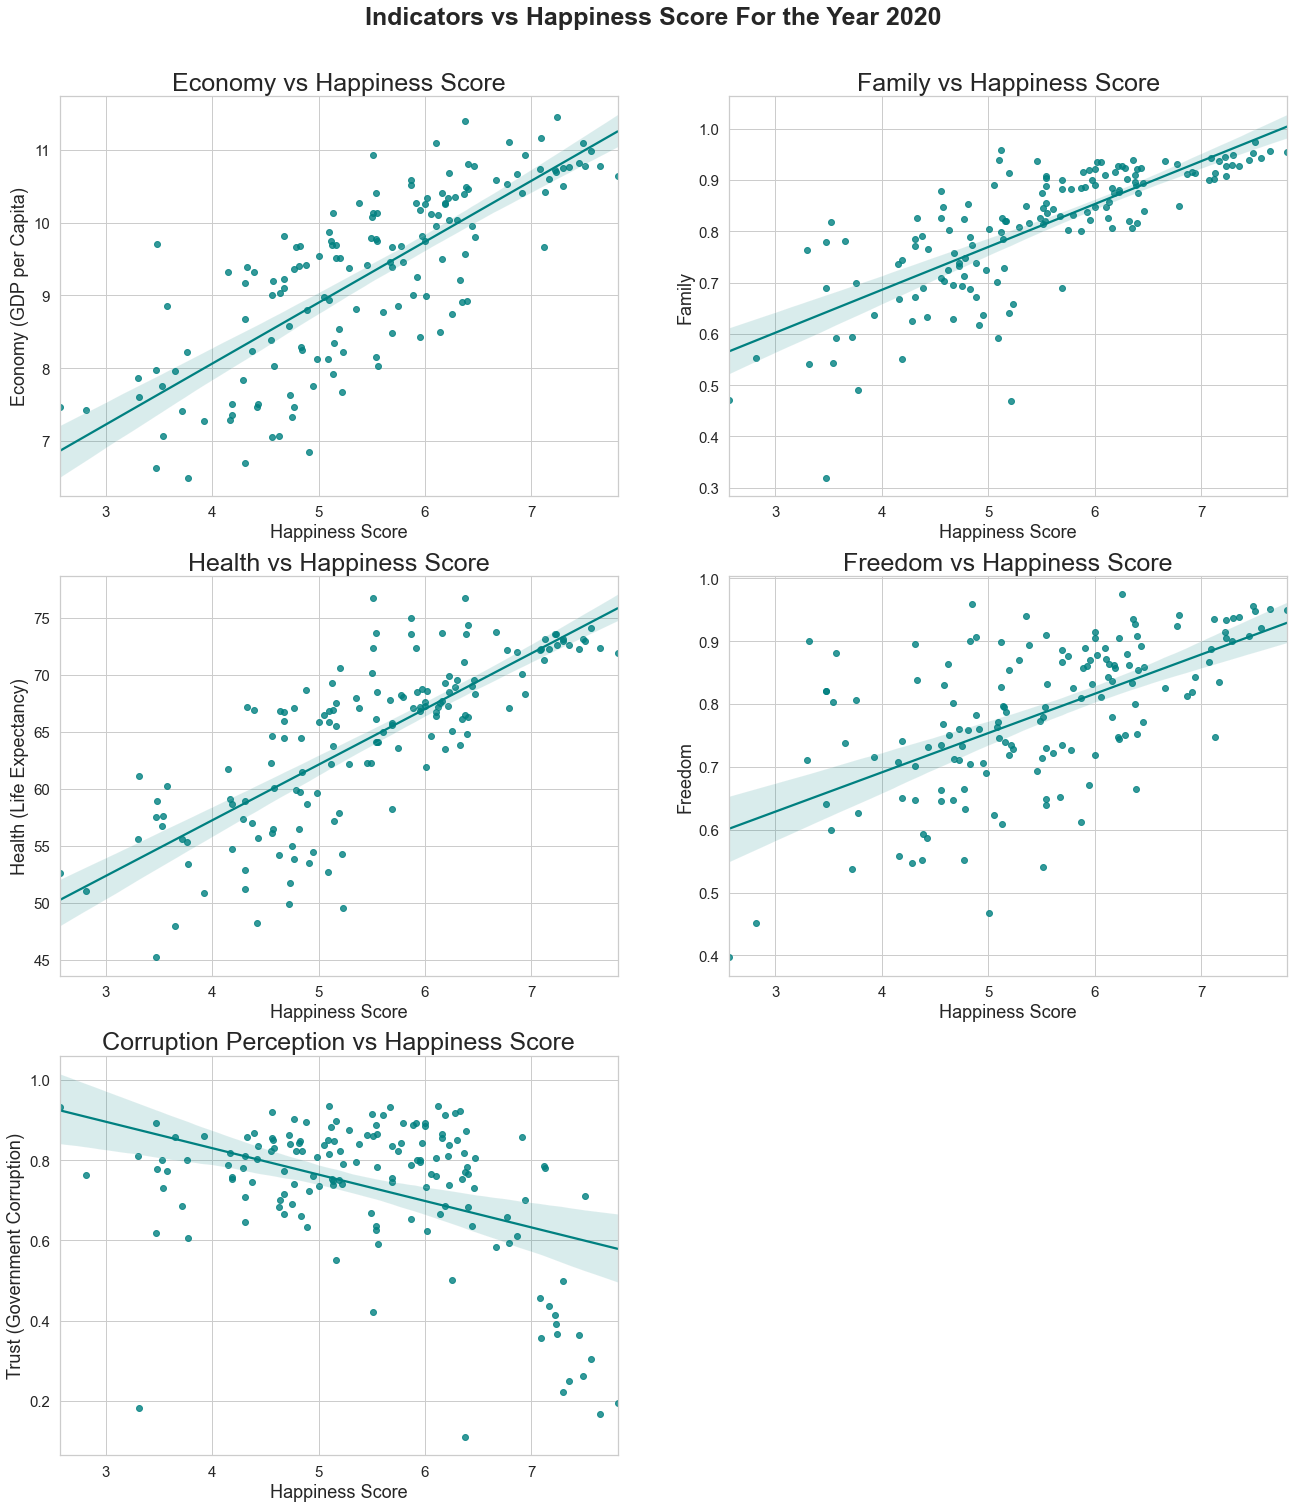

In [20]:
fig = plt.figure(figsize=(22,25))
plt.suptitle('Indicators vs Happiness Score For the Year 2020', y=0.93, fontsize=25, weight='bold');

ax = fig.add_subplot(3,2,1)
ax.set_title("Economy vs Happiness Score", fontsize=25)
sns.regplot(x=df_2020['Happiness Score'], y=df_2020['Economy (GDP per Capita)'], color="teal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Happiness Score', fontsize=18)
ax.set_ylabel('Economy (GDP per Capita)', fontsize=18)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title("Family vs Happiness Score", fontsize=25)
sns.regplot(x=df_2020['Happiness Score'], y=df_2020['Family'], color="teal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.set_xlabel('Happiness Score', fontsize=18)
ax2.set_ylabel('Family', fontsize=18)

ax3 = fig.add_subplot(3,2,3)
ax3.set_title("Health vs Happiness Score", fontsize=25)
sns.regplot(x=df_2020['Happiness Score'], y=df_2020['Health (Life Expectancy)'], color="teal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax3.set_xlabel('Happiness Score', fontsize=18)
ax3.set_ylabel('Health (Life Expectancy)', fontsize=18)

ax4 = fig.add_subplot(3,2,4)
ax4.set_title("Freedom vs Happiness Score", fontsize=25)
sns.regplot(x=df_2020['Happiness Score'], y=df_2020['Freedom'], color="teal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax4.set_xlabel('Happiness Score', fontsize=18)
ax4.set_ylabel('Freedom', fontsize=18)


ax5 = fig.add_subplot(3,2,5)
ax5.set_title("Corruption Perception vs Happiness Score", fontsize=25)
sns.regplot(x=df_2020['Happiness Score'], y=df_2020['Trust (Government Corruption)'], color="teal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax5.set_xlabel('Happiness Score', fontsize=18)
ax5.set_ylabel('Trust (Government Corruption)', fontsize=18)

fig.savefig('fig3_Scatter_Celon_Patricia.png');

# plt.tight_layout();

#### **Figure 3.** Scatter Plot w/ Regression line for all Indicators for the Year 2020
Of all the Indicators of Happiness Score, for the year 2020, we are only seeing a negative slope on Trust Factor. Seems that most countries that have a high Happiness Score for the Year 2020 tend to have lower trust on their government. Why is this the case? (note: this is only the case for 2020)

In [21]:
df_2020.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Year
Happiness Rank,1.000000,-0.985263,-0.777302,-0.749488,-0.769746,-0.583441,0.394355,-0.468969,NaN
Happiness Score,-0.985263,1.000000,0.775374,0.765001,0.770316,0.590597,-0.418305,0.480279,NaN
Economy (GDP per Capita),-0.777302,0.775374,1.000000,0.781814,0.848469,0.419019,-0.334729,-0.062063,NaN
Family,-0.749488,0.765001,0.781814,1.000000,0.742744,0.478863,-0.210530,-0.002801,NaN
Health (Life Expectancy),-0.769746,0.770316,0.848469,0.742744,1.000000,0.448846,-0.353841,-0.039948,NaN
Freedom,-0.583441,0.590597,0.419019,0.478863,0.448846,1.000000,-0.420145,0.062571,NaN
Trust (Government Corruption),0.394355,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,1.000000,0.017851,NaN
Dystopia Residual,-0.468969,0.480279,-0.062063,-0.002801,-0.039948,0.062571,0.017851,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bottom Countries Heatmap

Examining different indicators for bottom ranking countries since Leading Countries seem to have a consensus

In [22]:
#bottom countries

bottom_10 = merged_df.pivot(index='Country', columns='Year', values=['Happiness Score'])
# droping countries that are not not present in all of 2015-2020
bottom_10 = bottom_10.dropna(axis = 0)
# Adding a calculated avg column
bottom_10['Average'] = bottom_10.mean(axis = 1)
# Adding a calculated avg column
bottom_10['Rank'] = bottom_10['Average'].rank(ascending=False)
# Getting the top 10 entries
bottom_10 = bottom_10.sort_values(by = ['Average'], ascending=True).head(10)
bottom_10

Happiness Score                                       Average  \
Year                   2015   2016   2017   2018   2019    2020             
Country                                                                     
Burundi               2.905  2.905  2.905  2.905  3.775  3.7753  3.195050   
Afghanistan           3.575  3.360  3.794  3.632  3.203  2.5669  3.355150   
Rwanda                3.465  3.515  3.471  3.408  3.334  3.3123  3.417550   
Tanzania              3.781  3.666  3.349  3.303  3.231  3.4762  3.467700   
Yemen                 4.077  3.724  3.593  3.355  3.380  3.5274  3.609400   
Togo                  2.839  3.303  3.495  3.999  4.085  4.1872  3.651367   
Botswana              4.332  3.974  3.766  3.590  3.488  3.4789  3.771483   
Madagascar            3.681  3.695  3.644  3.774  3.933  4.1656  3.815433   
Malawi                4.292  4.156  3.970  3.587  3.410  3.5380  3.825500   
Haiti                 4.518  4.028  3.603  3.582  3.597  3.7208  3.841467   

              Rank  
Year                
Country             
Burundi      138.0  
Afghanistan  137.0  
Rwanda       136.0  
Tanzania     135.0  
Yemen        134.0  
Togo         133.0  
Botswana     132.0  
Madagascar   131.0  
Malawi       130.0  
Haiti        129.0

In [23]:
# bottom_10
flattened = pd.DataFrame(bottom_10.to_records())
plot_bottom_5 = pd.melt(flattened, id_vars=["Country","('Average', '')","('Rank', '')"])
lst_bottom_5 = plot_bottom_5#.head()
lst_bottom_5 = lst_bottom_5['Country'].tolist()

data_bottom_5 = merged_df[merged_df['Country'].isin(lst_bottom_5)]

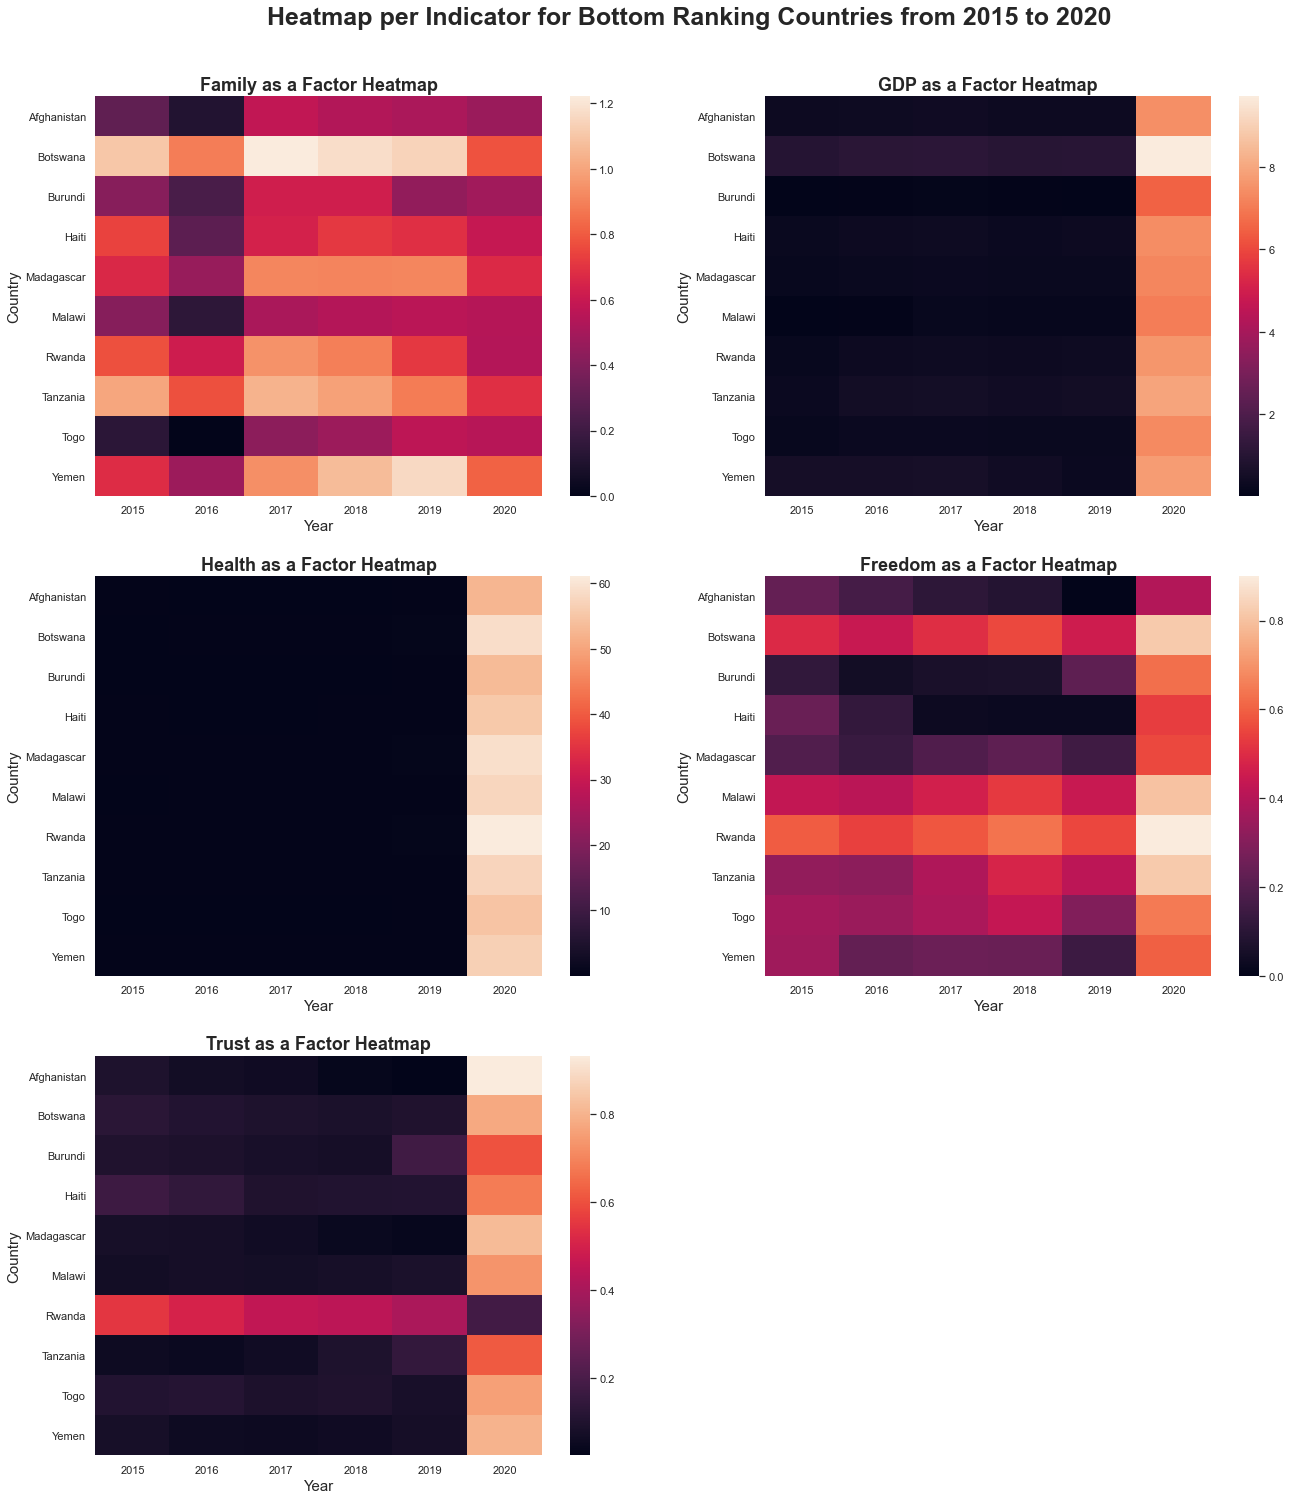

In [24]:
fig = plt.figure(figsize=(22,25))
plt.suptitle('Heatmap per Indicator for Bottom Ranking Countries from 2015 to 2020', y=0.93, fontsize=25, weight='bold');


ax = fig.add_subplot(3,2,1)
ax.set_title("Family as a Factor Heatmap", fontsize=18, weight='bold')
fam_bottom_data_5 = data_bottom_5.pivot('Country','Year', 'Family')
sns.heatmap(fam_bottom_data_5)
ax.set_ylabel('Country', fontsize=15)
ax.set_xlabel('Year', fontsize=15)


ax2 = fig.add_subplot(3,2,2)
ax2.set_title("GDP as a Factor Heatmap", fontsize=18, weight='bold')
econ_bottom_data_5 = data_bottom_5.pivot('Country','Year', 'Economy (GDP per Capita)')
sns.heatmap(econ_bottom_data_5)
ax2.set_ylabel('Country', fontsize=15)
ax2.set_xlabel('Year', fontsize=15)



ax3 = fig.add_subplot(3,2,3)
ax3.set_title("Health as a Factor Heatmap", fontsize=18, weight='bold')
le_bottom_data_5 = data_bottom_5.pivot('Country','Year', 'Health (Life Expectancy)')
sns.heatmap(le_bottom_data_5)
ax3.set_ylabel('Country', fontsize=15)
ax3.set_xlabel('Year', fontsize=15)


ax4 = fig.add_subplot(3,2,4)
ax4.set_title("Freedom as a Factor Heatmap", fontsize=18, weight='bold')
free_bottom_data_5 = data_bottom_5.pivot('Country','Year', 'Freedom')
sns.heatmap(free_bottom_data_5)
ax4.set_ylabel('Country', fontsize=15)
ax4.set_xlabel('Year', fontsize=15)


ax5 = fig.add_subplot(3,2,5)
ax5.set_title("Trust as a Factor Heatmap", fontsize=18, weight='bold')
trust_bottom_data_5 = data_bottom_5.pivot('Country','Year', 'Trust (Government Corruption)')
sns.heatmap(trust_bottom_data_5)
ax5.set_ylabel('Country', fontsize=15)
ax5.set_xlabel('Year', fontsize=15)

fig.savefig('fig4_Heatmap_Celon_Patricia.png');

# plt.tight_layout();

#### **Figure 4.** Heatmap per Indicator for the bottom ranking countries from 2015 to 2020
For the year 2020 we're seeing that most indicators are on the higher spectrum.